# Activity 1.2 : Training Neural Networks


## Objective(s):

This activity aims to demonstrate how to train neural networks using keras

## Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks
* Demonstrate how to evaluate and plot the model using training and validation loss


## Resources:
* Jupyter Notebook

CI Pima Diabetes Dataset

* pima-indians-diabetes.csv


## Procedures

Load the necessary libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

%matplotlib inline

In [9]:
## Import Keras objects for Deep Learning

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

Load the dataset

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
filepath = "/content/drive/MyDrive/Dataset/pima-indians-diabetes.csv"
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin",
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(filepath, names=names)

Check the top 5 samples of the data

In [12]:
print(diabetes_df.shape)
diabetes_df.sample(5)

(768, 9)


,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
354,3,90,78,0,0,42.7,0.559,21,0
404,5,168,64,0,0,32.9,0.135,41,1
670,6,165,68,26,168,33.6,0.631,49,0
513,2,91,62,0,0,27.3,0.525,22,0
605,1,124,60,32,0,35.8,0.514,21,0


In [13]:
diabetes_df.dtypes

times_pregnant              int64
glucose_tolerance_test      int64
blood_pressure              int64
skin_thickness              int64
insulin                     int64
bmi                       float64
pedigree_function         float64
age                         int64
has_diabetes                int64
dtype: object

In [14]:
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

Split the data to Train, and Test (75%, 25%)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [16]:
np.mean(y), np.mean(1-y)

(0.3489583333333333, 0.6510416666666666)

Build a single hidden layer neural network using 12 nodes.
Use the sequential model with single layer network and input shape to 8.



Normalize the data

In [17]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

***Analysis: In this code, normalizing the dataset using the standard scaler helps our neural network reduce the complexity of the problem we are trying to solve. Normalizing the dataset can be faster and improve the accuracy and also it can lead to more efficient neural network training.***

Define the model:
* Input size is 8-dimensional
* 1 hidden layer, 12 hidden nodes, sigmoid activation
* Final layer with one node and sigmoid activation (standard for binary classification)

In [18]:
model  = Sequential([
    Dense(12, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

***Analysis: The code above shows the model has a 2 layers the first one has a 12 hidden nodes and with relu activation function (relu function -- a most widely used activation function in neural network and the relu function, if the input is negative it will convert it to zero) and the last layer is the output layer which has 1 node and sigmoid activation function.***

***Typically, in a binary classification the final layer has 2 nodes which means it allows the neural network to output each class to distinguish if the person has diabetes or not the two nodes assign probabilities to each class based on the input features.***

View the model summary

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


***Analysis: The output of the code shows what type of layer has a model (which we used the dense because this is one of the common types of layers used in neural networks) since we have 2 layers, 1 hidden layer with shape of 12 since we have 12 nodes and 1 output layer with 1 node.***

***In the param column, this shows the number of parameters in the layer. 108 param because the number in a layer is calculated as (inputSize * outputSize) + outputSize. The other category below which is the total params indicates the total number of parameters in the entire model. The trainable params indicate the number of trainable params that are trainable during the training process. Lastly, the non-trainable params which means the params that are not trainable.***

Train the model
* Compile the model with optimizer, loss function and metrics
* Use the fit function to return the run history.


In [20]:
model.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)

Epoch 1/200
18/18 [==============================] - 1s 14ms/step - loss: 0.8493 - accuracy: 0.4514 - val_loss: 0.7980 - val_accuracy: 0.4479
Epoch 2/200
18/18 [==============================] - 0s 4ms/step - loss: 0.7921 - accuracy: 0.4618 - val_loss: 0.7514 - val_accuracy: 0.4896
Epoch 3/200
18/18 [==============================] - 0s 5ms/step - loss: 0.7484 - accuracy: 0.5000 - val_loss: 0.7152 - val_accuracy: 0.5260
Epoch 4/200
18/18 [==============================] - 0s 4ms/step - loss: 0.7140 - accuracy: 0.5365 - val_loss: 0.6867 - val_accuracy: 0.5677
Epoch 5/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6867 - accuracy: 0.5608 - val_loss: 0.6638 - val_accuracy: 0.6094
Epoch 6/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6641 - accuracy: 0.5851 - val_loss: 0.6454 - val_accuracy: 0.6562
Epoch 7/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6451 - accuracy: 0.6094 - val_loss: 0.6299 - val_accuracy: 0.6615
Epoch 8/200


***Analysis: The output shows how many loss on the training data, it measure how well the model's predictions match the true labels. The accuracy which means the accuracy of the model on the training data. the val_loss which is the loss function of the validation data, it provides the estimated performance in the unseen data. Lastly, the val_accuracy which represent the accuracy of the validation data.***

***In this case, in 200 epoch the loss is about 0.4339 and the accuracy of the model in the training data is 0.7847. In terms of the validation data the loss function is 0.5157 while the accuracy is 0.7552. This means that the training loss is lower than the validation loss and comparing on the unseen data the the model tends to overfitting because it can't generalize well.***

In [21]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.

y_pred_class_nn_1 =(model.predict(X_test_norm) > 0.5).astype("int32")
y_pred_prob_nn_1 = model.predict(X_test_norm)

6/6 [==============================] - 0s 3ms/step


In [22]:
# Let's check out the outputs to get a feel for how keras apis work.
y_pred_class_nn_1[:10]

array([[1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0]], dtype=int32)

In [23]:
y_pred_prob_nn_1[:10]

array([[0.52334374],
       [0.6905123 ],
       [0.2950822 ],
       [0.16296263],
       [0.25500455],
       [0.53652996],
       [0.02189776],
       [0.2571952 ],
       [0.91407186],
       [0.13676892]], dtype=float32)

Create the plot_roc function

In [24]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])

Evaluate the model performance and plot the ROC CURVE

accuracy is 0.766
roc-auc is 0.829


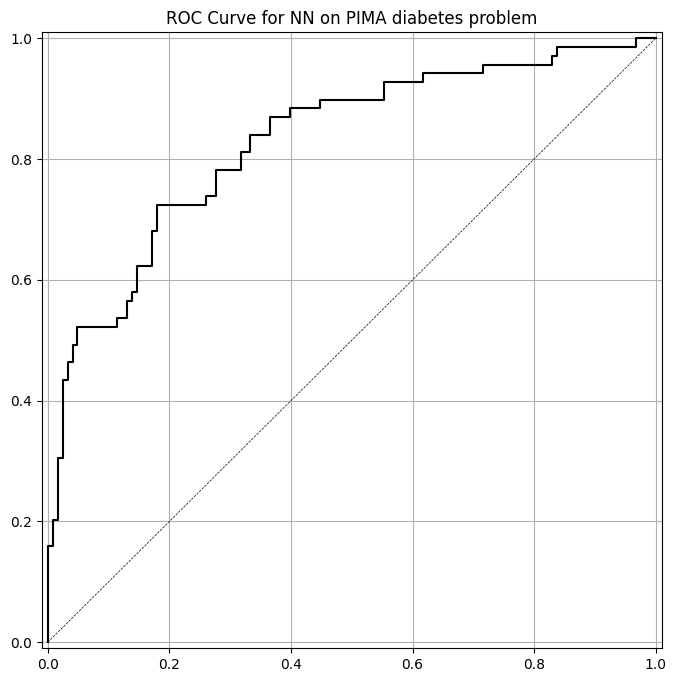

In [25]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

***Interpretation: The graph shows that the curve is far from the diagonal line which means that the model is good at predicting the classification in the dataset.***

 Plot the training loss and the validation loss over the different epochs and see how it looks

In [26]:
run_hist_1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

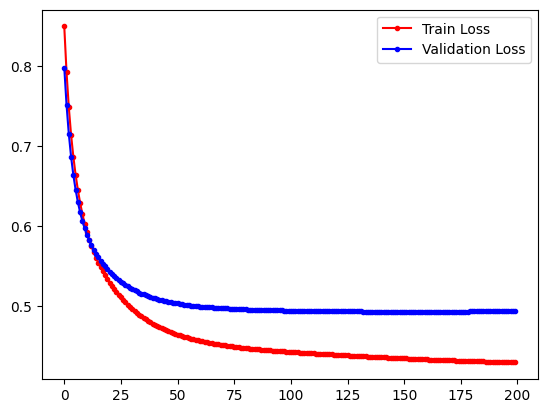

In [27]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

What is your interpretation about the result of the train and validation loss?

***Analysis: The train loss has decrease over time which is good while the validation also do the same this means that the model is improving in predicting the classification on unseen data overtime.***

## Supplementary Activity

* Build a model with two hidden layers, each with 6 nodes
* Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
* Use a learning rate of .003 and train for 1500 epochs
* Graph the trajectory of the loss functions, accuracy on both train and test set
* Plot the roc curve for the predictions
* Use different learning rates, numbers of epochs, and network structures.
* Plot the results of training and validation loss using different learning rates, number of epochs and network structures
* Interpret your result

### Raisin Dataset (Binary Classification)

* Data Preparation

In [28]:
raisin_df = pd.read_excel("/content/drive/MyDrive/Dataset/Raisin_Dataset.xlsx")

In [29]:
print(raisin_df.shape)
raisin_df.head(5)

(900, 8)


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [30]:
raisin_df.dtypes

Area                 int64
MajorAxisLength    float64
MinorAxisLength    float64
Eccentricity       float64
ConvexArea           int64
Extent             float64
Perimeter          float64
Class               object
dtype: object

In [31]:
raisin_df['Class'].unique()

array(['Kecimen', 'Besni'], dtype=object)

In [32]:
raisin_df['Class'] = raisin_df['Class'].apply(lambda x:1 if x == 'Kecimen' else 0)

In [33]:
raisin_df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,1
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,1
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,1
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,1
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,1
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,0
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,0
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,0
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,0


In [34]:
X = raisin_df.iloc[:, :-1].values
y = raisin_df["Class"].values

In [35]:
## Split the data into train and test (80%, 20%)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [36]:
np.mean(y), np.mean(1-y)

(0.5, 0.5)

In [37]:
## Normalize the data

normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

* Build a model with two hidden layers, each with 6 nodes
* Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer

In [38]:
## Build a model

model_1 = Sequential([
    Dense(6, input_shape=(7,), activation="relu"),
    Dense(6, activation="relu"),
    Dense(1, activation="sigmoid")
])

In [39]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 6)                 48        
                                                                 
 dense_3 (Dense)             (None, 6)                 42        
                                                                 
 dense_4 (Dense)             (None, 1)                 7         
                                                                 
Total params: 97 (388.00 Byte)
Trainable params: 97 (388.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Use a learning rate of .003 and train for 1500 epochs
* Graph the trajectory of the loss functions, accuracy on both train and test set
* Plot the roc curve for the predictions

In [40]:
model_1.compile(Adam(learning_rate = .003),
                "binary_crossentropy",
                metrics=["accuracy"])

In [41]:
runHist_1 = model_1.fit(X_train_norm,
                        y_train,
                        validation_data = (X_test_norm, y_test),
                        epochs = 1500)

Epoch 1/1500
22/22 [==============================] - 2s 19ms/step - loss: 0.7293 - accuracy: 0.4963 - val_loss: 0.5848 - val_accuracy: 0.6044
Epoch 2/1500
22/22 [==============================] - 0s 6ms/step - loss: 0.5656 - accuracy: 0.6889 - val_loss: 0.4818 - val_accuracy: 0.8089
Epoch 3/1500
22/22 [==============================] - 0s 5ms/step - loss: 0.4767 - accuracy: 0.7985 - val_loss: 0.4234 - val_accuracy: 0.8489
Epoch 4/1500
22/22 [==============================] - 0s 4ms/step - loss: 0.4221 - accuracy: 0.8341 - val_loss: 0.3906 - val_accuracy: 0.8578
Epoch 5/1500
22/22 [==============================] - 0s 5ms/step - loss: 0.3937 - accuracy: 0.8533 - val_loss: 0.3718 - val_accuracy: 0.8622
Epoch 6/1500
22/22 [==============================] - 0s 4ms/step - loss: 0.3777 - accuracy: 0.8637 - val_loss: 0.3619 - val_accuracy: 0.8756
Epoch 7/1500
22/22 [==============================] - 0s 4ms/step - loss: 0.3683 - accuracy: 0.8622 - val_loss: 0.3586 - val_accuracy: 0.8800
Epoch

In [42]:
y_pred_class = (model_1.predict(X_test_norm) > 0.5).astype("int32")
y_pred_prob = model_1.predict(X_test_norm)

8/8 [==============================] - 0s 2ms/step


In [43]:
y_pred_class[:10]

array([[1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0]], dtype=int32)

In [44]:
y_pred_prob[:10]

array([[7.2191173e-01],
       [1.3870084e-02],
       [2.1162150e-05],
       [9.2949367e-01],
       [8.3991212e-01],
       [1.4052172e-01],
       [0.0000000e+00],
       [9.2456281e-01],
       [9.7833681e-01],
       [2.0002984e-03]], dtype=float32)

In [45]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} Dataset'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])

accuracy is 0.871
roc-auc is 0.921


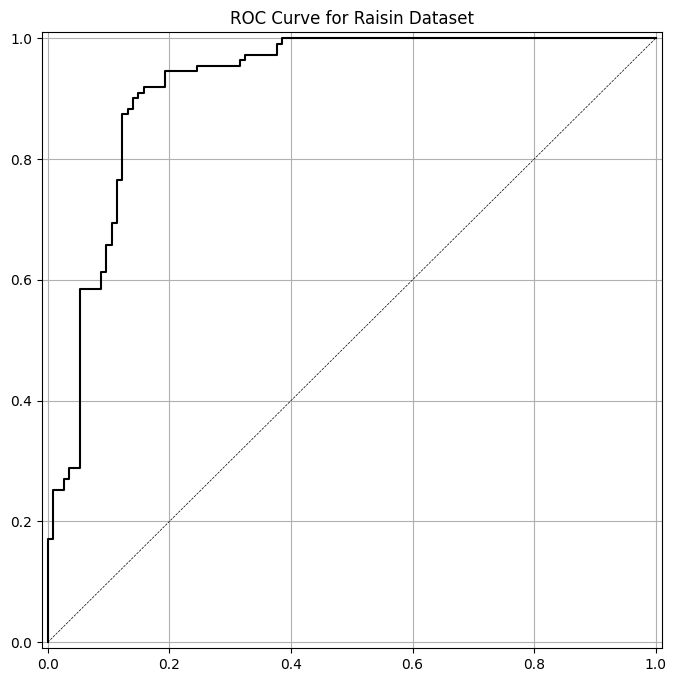

In [46]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob)))

plot_roc(y_test, y_pred_prob, 'Raisin')

***Interpretation: The graph which has 92% of roc-auc score shows that the curve is far from the diagonal line which means that the model is good at predicting the classification in the raisin dataset.***

In [47]:
runHist_1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

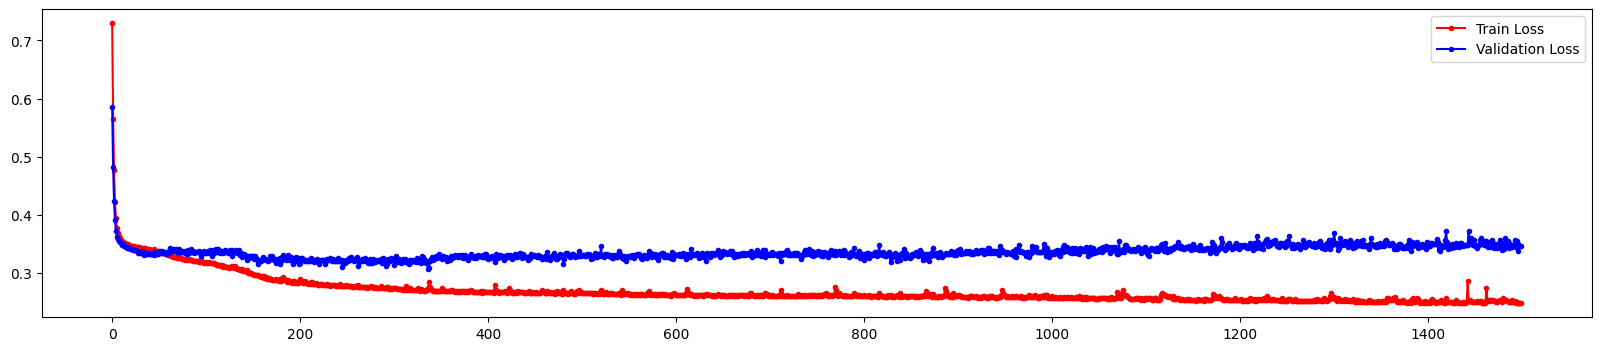

In [48]:
fig, ax = plt.subplots(figsize=(20, 4))
ax.plot(runHist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(runHist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

***Interpretation: The validation loss is gradually increasing over time this means that the model performance is not quite good in predicting the classification in unseen dataset while the train loss is decreasing over time and there is some increasing but it also slowly decreasing which means the model is good in predicting the classification in training set.***

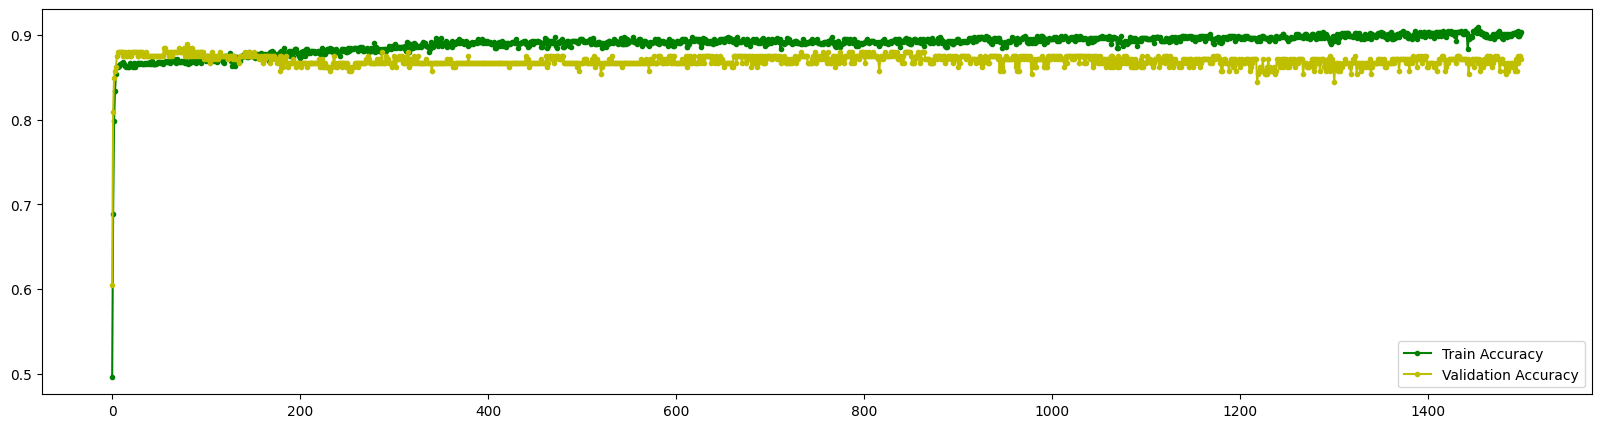

In [49]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(runHist_1.history["accuracy"],'g', marker='.', label="Train Accuracy")
ax.plot(runHist_1.history["val_accuracy"],'y', marker='.', label="Validation Accuracy")
ax.legend()

***Interpretation: Since the validation loss above was increasing slowly the validation accuracy in this graph is decreasing while the train accuracy is increasing. This means that the model is overfitting to the training data and can't perform well in the unseen dataset.***

* Use different learning rates, numbers of epochs, and network structures.
* Plot the results of training and validation loss using different learning rates, number of epochs and network structures
* Interpret your result

In [50]:
## Build a model

model_1p2 = Sequential([
    Dense(64, input_shape=(7,), activation="relu"),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation="relu"),
    Dense(1, activation="sigmoid")
])

In [51]:
model_1p2.compile(SGD(learning_rate = .001),
                "binary_crossentropy",
                metrics=["accuracy"])

In [52]:
runHist_1p2 = model_1p2.fit(X_train_norm,
                        y_train,
                        validation_data = (X_test_norm, y_test),
                        epochs = 300)

Epoch 1/300
22/22 [==============================] - 1s 12ms/step - loss: 0.6504 - accuracy: 0.5126 - val_loss: 0.6232 - val_accuracy: 0.5067
Epoch 2/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6459 - accuracy: 0.5096 - val_loss: 0.6155 - val_accuracy: 0.5067
Epoch 3/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6378 - accuracy: 0.5141 - val_loss: 0.6085 - val_accuracy: 0.5067
Epoch 4/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6336 - accuracy: 0.5289 - val_loss: 0.6023 - val_accuracy: 0.5200
Epoch 5/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6278 - accuracy: 0.5393 - val_loss: 0.5961 - val_accuracy: 0.5378
Epoch 6/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6222 - accuracy: 0.5348 - val_loss: 0.5908 - val_accuracy: 0.5733
Epoch 7/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6165 - accuracy: 0.5689 - val_loss: 0.5848 - val_accuracy: 0.6222
Epoch 8/300


In [53]:
y_pred_class = (model_1p2.predict(X_test_norm) > 0.5).astype("int32")
y_pred_prob = model_1p2.predict(X_test_norm)

8/8 [==============================] - 0s 3ms/step


accuracy is 0.880
roc-auc is 0.919


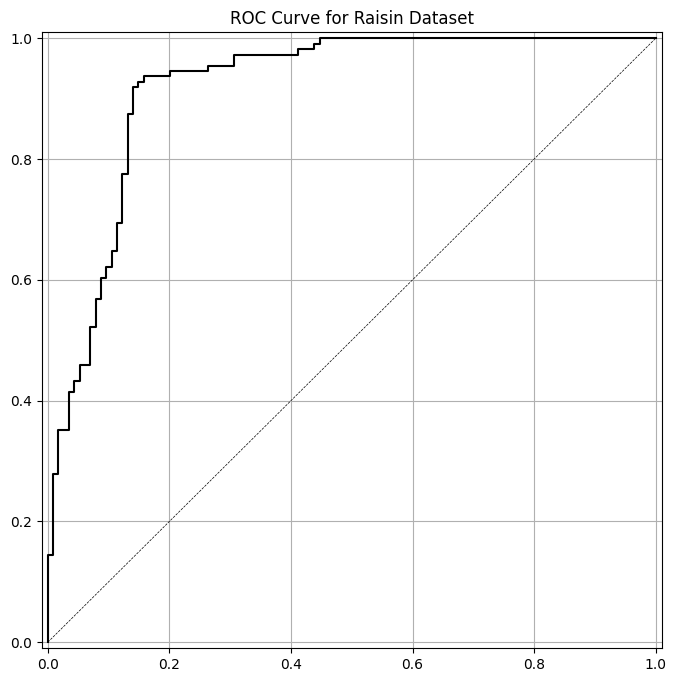

In [54]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob)))

plot_roc(y_test, y_pred_prob, 'Raisin')

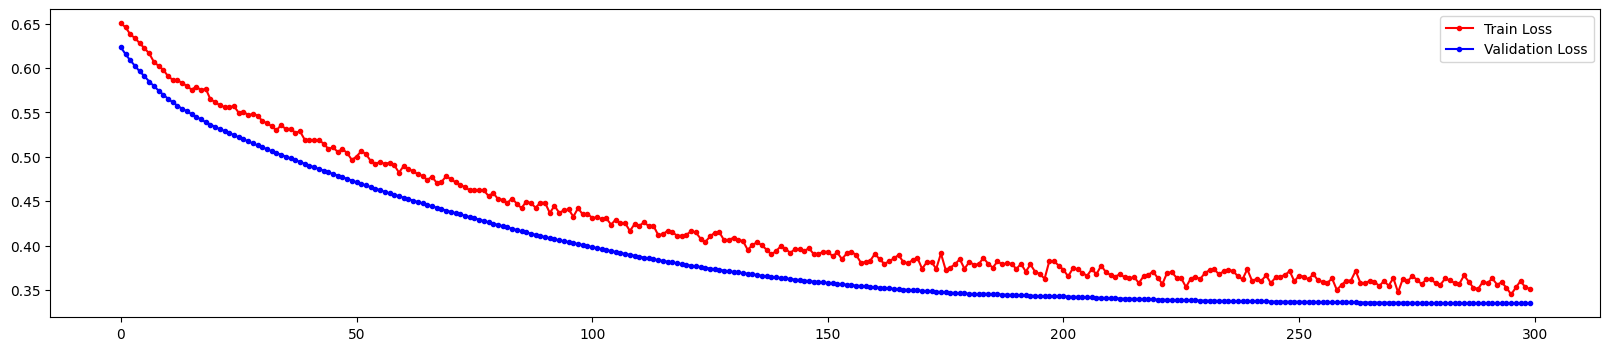

In [55]:
fig, ax = plt.subplots(figsize=(20, 4))
ax.plot(runHist_1p2.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(runHist_1p2.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

***Interpretation:In modifying the model, the validation loss shows decreasing over epoch which it shows that it smoother compared to the train loss. The training loss shows some fluctuations but it decreasing over time. The graph shows that the model is learning and improving its performance.***

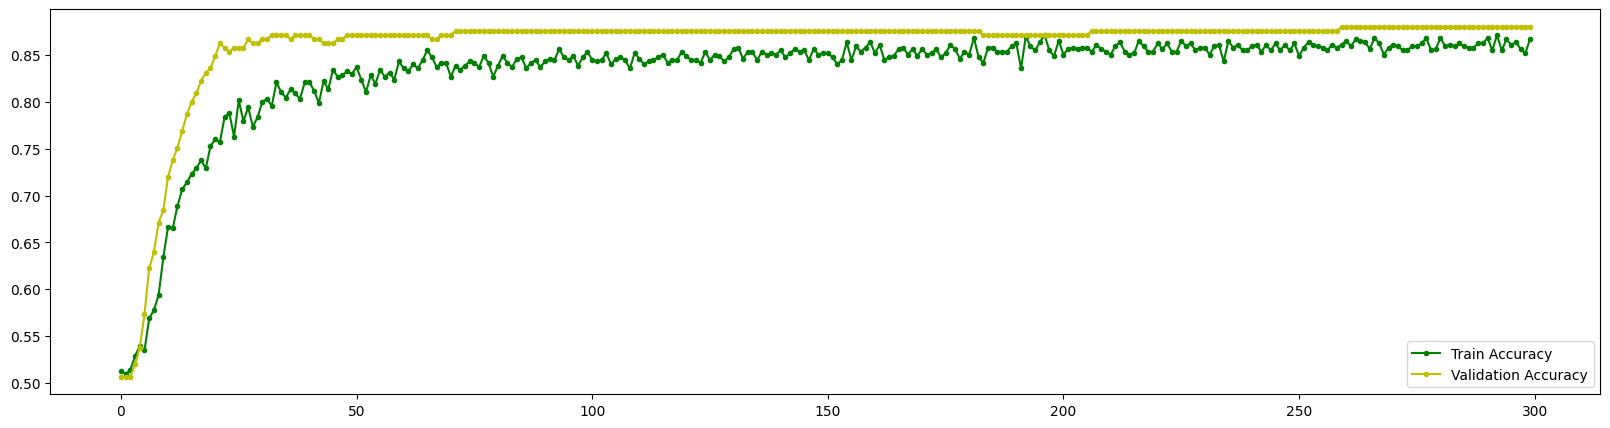

In [56]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(runHist_1p2.history["accuracy"],'g', marker='.', label="Train Accuracy")
ax.plot(runHist_1p2.history["val_accuracy"],'y', marker='.', label="Validation Accuracy")
ax.legend()

***Interpretation: The graph  shows that the validation and training accuracy both increasing between 1-50 epochs  and then it begin to plateau. The train accuracy increasing slightly over epochs while the validation accuracy plateaus around an accuracy of approximately 88%. The graph shows that the model performs well in training set and it generalize the unseen data. Since the validation accuracy plateau this could mean that it may need to improve the performance of the model.***

### MNIST Dataset (Multi-class classification)

#### Data Preparation

In [57]:
import keras
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [58]:
print("Train set: ", X_train.shape, y_train.shape)
print("Test set: ", X_test.shape, y_test.shape)

Train set:  (60000, 28, 28) (60000,)
Test set:  (10000, 28, 28) (10000,)


* ***The binary classification categorize onlu two classes which is simplier than the multi-class which is complex because there is more than two class.***
* ***In real-world multi-class is applicable in many areas like image recognition while the binary can apply the real-world problems like spam detection, fraud detection etc.***
* ***The multi-class provides more information compared to binary class and it allows to understand the underlying patters.***

#### MNIST Dataset Visualization

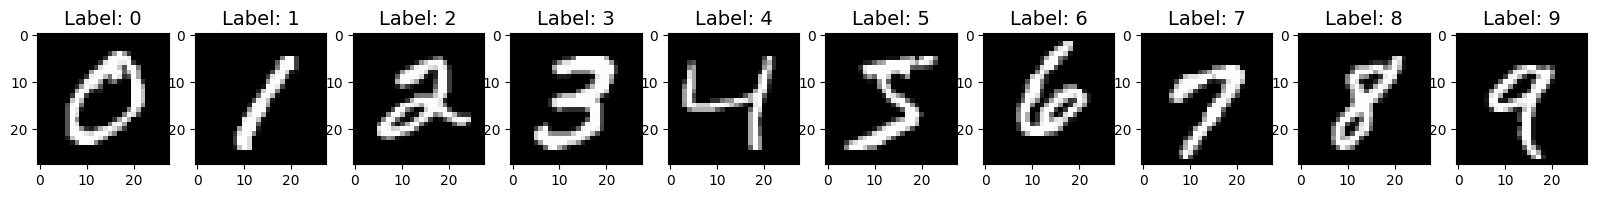

In [59]:
num_classes = 10
fig, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
  sample = X_train[y_train == i][0]
  ax[i].imshow(sample, cmap="gray")
  ax[i].set_title("Label: {}".format(i), fontsize=14)

In [60]:
for i in range(10):
  print(y_train[i])

5
0
4
1
9
2
1
3
1
4


In [61]:
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [62]:
for i in range(10):
  print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


#### Normalizing Data

In [63]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [64]:
# reshape data

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [65]:
print(X_train.shape)

(60000, 784)


#### Create Model

In [66]:
## Build a model with two hidden layers, each with 6 nodes
## Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer

model_2 = Sequential([
    Dense(6, input_shape=(784,), activation="relu"),
    Dense(6, activation="relu"),
    Dropout(0.25),
    Dense(10, activation="sigmoid")
])

In [67]:
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 6)                 4710      
                                                                 
 dense_10 (Dense)            (None, 6)                 42        
                                                                 
 dropout_1 (Dropout)         (None, 6)                 0         
                                                                 
 dense_11 (Dense)            (None, 10)                70        
                                                                 
Total params: 4822 (18.84 KB)
Trainable params: 4822 (18.84 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [68]:
## Use a learning rate of .003 and train for 1500 epochs

model_2.compile(SGD(learning_rate = .003),
                loss = "categorical_crossentropy",
                metrics = ["accuracy"])

In [69]:
runHist2 = model_2.fit(x = X_train,
                       y = y_train,
                       batch_size = 512,
                       validation_data = (X_test, y_test),
                       epochs = 1500
                       )

Epoch 1/1500
118/118 [==============================] - 1s 7ms/step - loss: 2.3120 - accuracy: 0.1401 - val_loss: 2.2946 - val_accuracy: 0.1551
Epoch 2/1500
118/118 [==============================] - 1s 4ms/step - loss: 2.2879 - accuracy: 0.1499 - val_loss: 2.2733 - val_accuracy: 0.1688
Epoch 3/1500
118/118 [==============================] - 1s 4ms/step - loss: 2.2632 - accuracy: 0.1570 - val_loss: 2.2385 - val_accuracy: 0.1999
Epoch 4/1500
118/118 [==============================] - 0s 4ms/step - loss: 2.2285 - accuracy: 0.1701 - val_loss: 2.1986 - val_accuracy: 0.2163
Epoch 5/1500
118/118 [==============================] - 1s 5ms/step - loss: 2.1949 - accuracy: 0.1831 - val_loss: 2.1591 - val_accuracy: 0.2402
Epoch 6/1500
118/118 [==============================] - 1s 5ms/step - loss: 2.1581 - accuracy: 0.2087 - val_loss: 2.1181 - val_accuracy: 0.2727
Epoch 7/1500
118/118 [==============================] - 1s 6ms/step - loss: 2.1181 - accuracy: 0.2339 - val_loss: 2.0733 - val_accuracy:

#### Evaluation

In [70]:
test_loss, test_acc = model_2.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.4893 - accuracy: 0.8748


In [71]:
print("Test loss: {}, Test accuracy: {}".format(test_loss, test_acc))

Test loss: 0.48929259181022644, Test accuracy: 0.8748000264167786


In [72]:
y_pred = model_2.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

313/313 [==============================] - 0s 1ms/step


In [73]:
print(y_pred)

[[1.7859047e-02 9.4682878e-01 7.1559283e-03 ... 9.9996585e-01
  5.4460996e-01 9.9353522e-01]
 [4.0704716e-02 9.6783632e-01 9.9619591e-01 ... 2.9696783e-02
  9.3080217e-01 2.8850960e-03]
 [2.3338996e-02 9.9523717e-01 8.2749826e-01 ... 8.5343933e-01
  7.2815078e-01 5.1412338e-01]
 ...
 [4.3957528e-02 1.7064291e-03 3.3718261e-01 ... 4.5013204e-01
  6.5817326e-01 9.7482789e-01]
 [3.4955766e-03 2.3761138e-01 7.8227110e-03 ... 3.5742676e-01
  9.9913752e-01 5.0469297e-01]
 [4.5740772e-03 7.4615487e-04 9.4264585e-01 ... 1.2934461e-01
  9.9610871e-01 2.4809337e-03]]


In [74]:
print(y_pred_classes)

[7 2 1 ... 4 5 6]


In [75]:
random_idx = np.random.choice(len(X_test))
x_sample = X_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

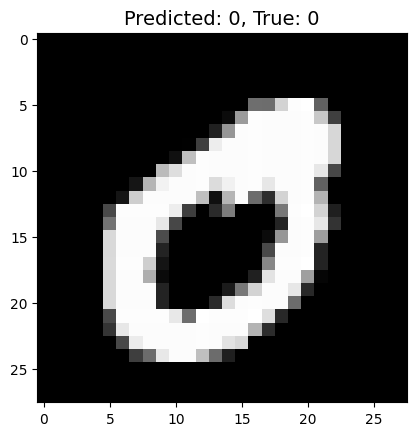

In [76]:
plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=14)
plt.imshow(x_sample.reshape(28, 28), cmap="gray")

In [77]:
runHist2.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

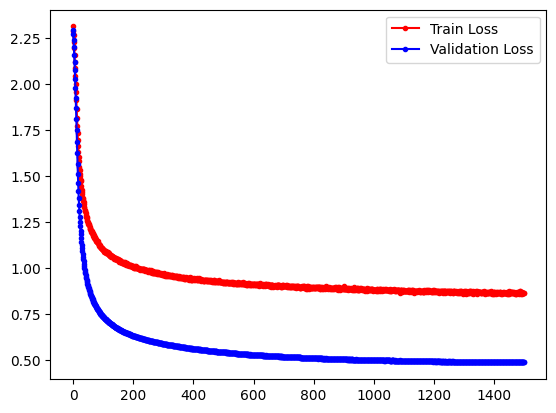

In [78]:
fig, ax = plt.subplots()
ax.plot(runHist2.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(runHist2.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

***Analysis: The training loss decreases over epochs which means the model is improving in predicting the classification in training dataset while the validation loss also do the same but it more lower and it indicates that the model is improving in classifying the data in the unseen dataset.***


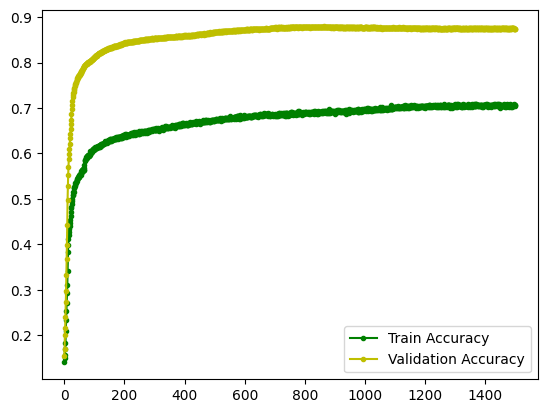

In [79]:
fig, ax = plt.subplots()
ax.plot(runHist2.history["accuracy"],'g', marker='.', label="Train Accuracy")
ax.plot(runHist2.history["val_accuracy"],'y', marker='.', label="Validation Accuracy")
ax.legend()

***Analysis: The both accuracy increasing over time and the model is good in unseen and training dataset.***

#### Use different learning rates, numbers of epochs, and network structures.

In [80]:
model_2p1 = Sequential([
    Dense(units=128, input_shape=(784,), activation="relu"),
    Dense(units=128, activation="relu"),
    Dropout(0.25),
    Dense(units=10, activation="softmax")
])

***Analysis: The model structure above is required in this supplementary activity using the different model structure and the appropriate structure for this MNIST dataset will shows the higher accuracy.***

In [81]:
model_2p1.compile(loss="categorical_crossentropy",
                  optimizer="adam",
                  metrics=["accuracy"])

In [82]:
model_2p1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               100480    
                                                                 
 dense_13 (Dense)            (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_14 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [83]:
## Train

batch_size = 512
epochs = 10

runHist2p1 = model_2p1.fit(x=X_train,
                           y=y_train,
                           batch_size=batch_size,
                           validation_data = (X_test, y_test),
                           epochs=epochs)

Epoch 1/10
118/118 [==============================] - 3s 17ms/step - loss: 0.5930 - accuracy: 0.8272 - val_loss: 0.2239 - val_accuracy: 0.9331
Epoch 2/10
118/118 [==============================] - 2s 18ms/step - loss: 0.2171 - accuracy: 0.9364 - val_loss: 0.1541 - val_accuracy: 0.9545
Epoch 3/10
118/118 [==============================] - 2s 13ms/step - loss: 0.1608 - accuracy: 0.9538 - val_loss: 0.1305 - val_accuracy: 0.9601
Epoch 4/10
118/118 [==============================] - 1s 11ms/step - loss: 0.1288 - accuracy: 0.9619 - val_loss: 0.1143 - val_accuracy: 0.9637
Epoch 5/10
118/118 [==============================] - 1s 12ms/step - loss: 0.1079 - accuracy: 0.9687 - val_loss: 0.1013 - val_accuracy: 0.9699
Epoch 6/10
118/118 [==============================] - 1s 11ms/step - loss: 0.0920 - accuracy: 0.9723 - val_loss: 0.0912 - val_accuracy: 0.9727
Epoch 7/10
118/118 [==============================] - 1s 12ms/step - loss: 0.0801 - accuracy: 0.9761 - val_loss: 0.0872 - val_accuracy: 0.9728

In [84]:
## Evaluation

test_loss, test_acc = model_2p1.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0781 - accuracy: 0.9761


In [85]:
print("Test loss: {:.3f}, Test accuracy: {:.3f}".format(test_loss, test_acc))

Test loss: 0.078, Test accuracy: 0.976


In [86]:
runHist2p1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

#### Plot the results of training and validation loss using different learning rates, number of epochs and network structures

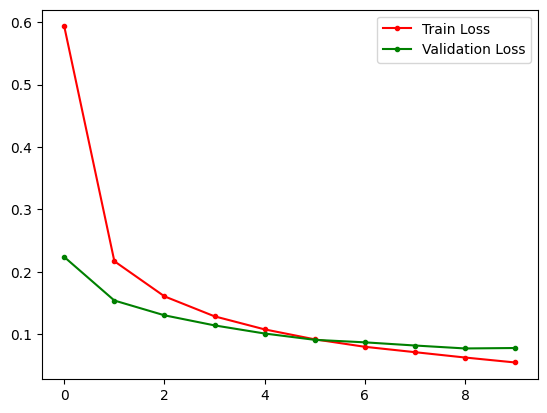

In [87]:
fig, ax = plt.subplots()
ax.plot(runHist2p1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(runHist2p1.history["val_loss"], 'g', marker='.', label="Validation Loss")
ax.legend()

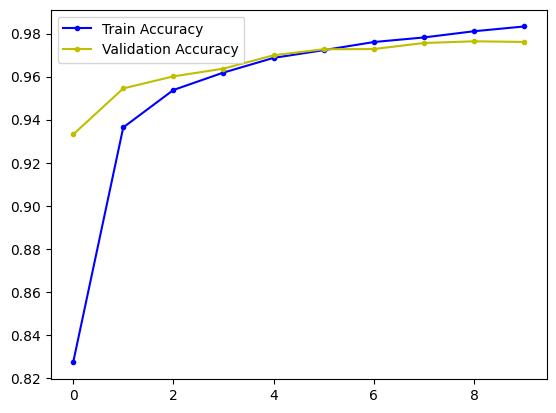

In [88]:
fig, ax = plt.subplots()
ax.plot(runHist2p1.history["accuracy"],'b', marker='.', label="Train Accuracy")
ax.plot(runHist2p1.history["val_accuracy"], 'y', marker='.',label="Validation Accuracy")
ax.legend()

***Analysis: The train loss decreases over time as well the validation but when the epochs reaches 5 the validation loss becomes plataue. In accuracy the train accuracy sharply increases over epochs and then the validation accuracy gradually increases. This means that the model shows that the perfomances is good at predicting the different class in the MNIST dataset.***

## Conclusion

In this activity, this shows us how to build a neural network with different layers and to analyze how the model performs in the binary and multi-class classification and what can be the effects of higher epoch and different learning rates to the performance of the model. In procedure, the performance of the trained neural network is good. When the training and validation loss decreases overtime this could means that performance of the model is good at predicting the binary classification but when it comes to multi-class classification which this type of classification can mostly encountered in real-world problems the problem can rely on how the model or network structure build because if we put a input layer with limited nodes it hardly to predict the correct classification because it compress the information in the input and it could lead to loss the important features and resucing the model's ability to predicting the correct classification. 